# Test libutils.cpp - Image 2D

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.random.seed(0)
bool_img = np.random.randint(0, 2, (20,20), dtype=bool)
neigh1 = np.array([[True, False],[True, False]])
neigh2 = np.array([[False, True],[True, False]])
img = np.random.randint(0, 256, (10,10), dtype=int)
img[1, 1] = 243

In [3]:
from nice.utils import print_dir
from nice.plot import matplotlib_plot, imshow_colorspace
import euchar.cppbinding.utils as u

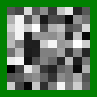

In [4]:
fig, ax = matplotlib_plot(figsize=(2,2), facecolor="g")
imshow_colorspace(ax, img, "BGR", title="")

***

In [5]:
print_dir(u)

Attributes and methods of <class 'module'> are:
---
__doc__
__file__                   | __loader__                 | __name__                   | __package__
__spec__                   | __version__                | binary_neigh_pixel_2d      | binary_neigh_voxel_3d
char_binary_image_2d       | char_binary_image_3d       | elementwise_AND_2d         | elementwise_AND_3d
neigh_2d_from_number       | neigh_3d_from_number       | neigh_pixel_2d             | neigh_voxel_3d
number_from_neigh_2d       | number_from_neigh_3d       | pad_2d                     | pad_3d
sum_bool_2d                | sum_bool_3d                | threshold_image_2d         | threshold_image_3d
vector_of_euler_changes_2d | vector_of_euler_changes_3d | 

### sum_bool_2d

In [6]:
u.sum_bool_2d(bool_img) == np.sum(bool_img)

True

### pad_2d

In [7]:
pad = np.array(u.pad_2d(img, 256))
print(pad)

[[256 256 256 256 256 256 256 256 256 256 256 256]
 [256  87  70 216  88 140  58 193 230  39  87 256]
 [256 174 243  81 165  25  77  72   9 148 115 256]
 [256 208 243 197 254  79 175 192  82  99 216 256]
 [256 177 243  29 147 147 142 167  32 193   9 256]
 [256 185 127  32  31 202 244 151 163 254 203 256]
 [256 114 183  28  34 128 128 164  53 133  38 256]
 [256 232 244  17  79 132 105  42 186  31 120 256]
 [256   1  65 231 169  57  35 102 119  11 174 256]
 [256  82  91 128 142  99  53 140 121 170  84 256]
 [256 203  68   6 196  47 127 244 131 204 100 256]
 [256 256 256 256 256 256 256 256 256 256 256 256]]


### threshold_image_2d

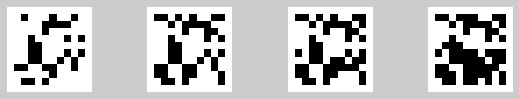

In [8]:
th = np.array([u.threshold_image_2d(pad, T) for T in [80, 100, 120, 140]])
fig, ax = matplotlib_plot(1, 4, figsize=(2,2), facecolor="#cccccc")
for i in range(4): imshow_colorspace(ax[i], -1*th[i]+1, "gray", title="")

### char_binary_image_2d

In [9]:
for i in range(4): print(f"i={i} -> {u.char_binary_image_2d(th[i]):d}", end=" | ")

i=0 -> 6 | i=1 -> 2 | i=2 -> 1 | i=3 -> 0 | 

### elementwise_AND_2d

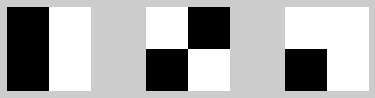

In [10]:
neigh3 = np.array(u.elementwise_AND_2d(neigh1, neigh2))
ne = [neigh1, neigh2, neigh3]
fig, ax = matplotlib_plot(1, 3, figsize=(2,2), facecolor="#cccccc")
for i in range(3): imshow_colorspace(ax[i], -1*ne[i]+1, "gray", title="")

### binary_neigh_pixel_2d

In [11]:
I, J = 3, 2
T = pad[I,J]
print("T:", T)
bool_neigh = np.array(u.binary_neigh_pixel_2d(pad, I, 2, T))
print(pad[I-1:I+2, 2-1:2+2])
print("cpp\n", bool_neigh)
print("np\n", pad[I-1:I+2, 2-1:2+2] <= T, "\n")

T: 243
[[174 243  81]
 [208 243 197]
 [177 243  29]]
cpp
 [[ True  True  True]
 [ True  True  True]
 [ True False  True]]
np
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]] 



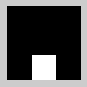

In [12]:
fig, ax = matplotlib_plot(figsize=(2,2), facecolor="#cccccc")
imshow_colorspace(ax, -1*bool_neigh+1)

### number_from_neigh_2d and neigh_2d_from_number

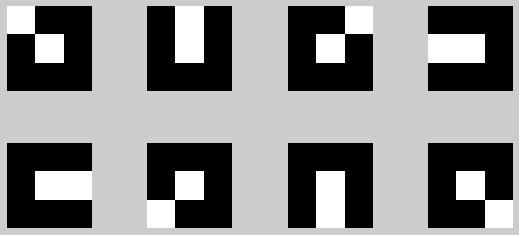

In [13]:
fig, ax = matplotlib_plot(2, 4, figsize=(2,2), facecolor="#cccccc")
for i in range(2): 
    for j in range(4): 
        exp = 2**(j+4*i)
        imshow_colorspace(ax[i, j], np.array(u.neigh_2d_from_number(exp)))

In [14]:
list_num_neigh = [n == u.number_from_neigh_2d(u.neigh_2d_from_number(n)) for n in range(256)]
print(all(list_num_neigh))

True


### vector_euler_changes_2d

In [15]:
vector_2d = u.vector_of_euler_changes_2d()
print(vector_2d, "\n---\nmin:", min(vector_2d))

[1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, -2, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, -2, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, -1, -1, -1, -1, -2, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, 0, -1, 0, 0, 0, -1, 0, 0, -1, -1, 0, 0, -1, -1, 0, 0, -1, -2, -2, -2, -2, -3, -2, -2, -1, -1, -1, -1, -2, -2, -1, -1, -1, -2, -1, -1, -1, -2, -1, -1, -1, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, -1, -1, -2, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, -1, -1, -1, -1, -2, -1, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1] 
---
min: -3


***

### Test speed

In [16]:
%%timeit
np.sum(bool_img)

9.13 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
%%timeit
u.sum_bool_2d(bool_img)

48 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
